In [ ]:
plt.rcdefaults()
# Typeface sizes
from matplotlib import rcParams
rcParams['axes.labelsize'] = 9
rcParams['xtick.labelsize'] = 9
rcParams['ytick.labelsize'] = 9
rcParams['legend.fontsize'] = 9
#rcParams['font.family'] = 'serif'
#rcParams['font.serif'] = ['Computer Modern Roman']
#rcParams['text.usetex'] = True

# Optimal figure size
WIDTH = 350.0  # the number latex spits out
FACTOR = 0.90  # the fraction of the width you'd like the figure to occupy
fig_width_pt  = WIDTH * FACTOR

inches_per_pt = 1.0 / 72.27
golden_ratio  = (np.sqrt(5) - 1.0) / 2.0  # because it looks good

fig_width_in  = fig_width_pt * inches_per_pt  # figure width in inches
fig_height_in = fig_width_in * golden_ratio   # figure height in inches
fig_dims      = [fig_width_in, fig_height_in] # fig dims as a list

rcParams['figure.figsize'] = fig_dims

In [51]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.mpl_style', 'default')
import statsmodels.api as sm
import itertools

KeyboardInterrupt: 

First, let's load the results from the small model of polled included in the default settings. This involves loading four animal files (live cows, dead cows, live bulls, and dead bulls). We will load them and merge them into a single data frame.

In [8]:
# We have 10 relicates for each simulation
for sim in xrange(1,11):
    # Load the individual history files
    lc = pd.read_csv('holstein/%s/cows_history_pryce_holstein_20.txt'%sim, sep='\t')
    dc = pd.read_csv('holstein/%s/dead_cows_history_pryce_holstein_20.txt'%sim, sep='\t')
    lb = pd.read_csv('holstein/%s/bulls_history_pryce_holstein_20.txt'%sim, sep='\t')
    db = pd.read_csv('holstein/%s/dead_bulls_history_pryce_holstein_20.txt'%sim, sep='\t')
    inbreeding = pd.read_csv('holstein/%s/pedigree_20.txt.solinb'%sim, delim_whitespace=True,
                             skipinitialspace=True, names=['animal','inbreeding'])
    # Stack the individual animal datasets
    allan = lc.append(dc.append(lb.append(db)))
    # Merge in the coefficients of inbreeding (Pandas defaults to an inner join)
    all_animals = pd.merge(allan, inbreeding, on='animal')
    all_animals['rep'] = sim
    if sim == 1:
        all_replicates = all_animals
    else:
        all_replicates = pd.concat([all_replicates, all_animals])
# Print first few lines of dataframe
#all_animals.head()

In [9]:
# Now load the Pryce+recessives data so that we can compare EBV.
# We have 10 relicates for each simulation
for sim in xrange(1,11):
    # Load the individual history files
    lc = pd.read_csv('holstein/%s/cows_history_pryce_r_holstein_20.txt'%sim, sep='\t')
    dc = pd.read_csv('holstein/%s/dead_cows_history_pryce_r_holstein_20.txt'%sim, sep='\t')
    lb = pd.read_csv('holstein/%s/bulls_history_pryce_r_holstein_20.txt'%sim, sep='\t')
    db = pd.read_csv('holstein/%s/dead_bulls_history_pryce_r_holstein_20.txt'%sim, sep='\t')
    inbreeding = pd.read_csv('holstein/%s/pedigree_20.txt.solinb'%sim, delim_whitespace=True,
                             skipinitialspace=True, names=['animal','inbreeding'])
    # Stack the individual animal datasets
    allan_r = lc.append(dc.append(lb.append(db)))
    # Merge in the coefficients of inbreeding (Pandas defaults to an inner join)
    all_animals_r = pd.merge(allan_r, inbreeding, on='animal')
    all_animals_r['rep'] = sim
    if sim == 1:
        all_replicates_r = all_animals_r
    else:
        all_replicates_r = pd.concat([all_replicates_r, all_animals_r])
# Print first few lines of dataframe
#all_animals.head()

In [10]:
all_replicates['rep'].value_counts()

9     1794876
8     1794702
6     1794686
4     1794674
3     1794602
10    1794414
5     1794391
7     1794075
1     1794023
2     1792994
dtype: int64

In [11]:
# N = culled to maintain herd size
# A = culled for age
# R = culled because of lethal disorder
all_animals['cause'].value_counts()

N    1618701
A     107252
R       3118
dtype: int64

How many males and females are in the dataset?

In [12]:
all_animals['sex'].value_counts()

F    913492
M    880922
dtype: int64

If we want to plot the average TBV by sex for each generation we first need to construct a dataframe that has the average (mean) TBV for each group-sex combination.

In [13]:
grouped = all_animals.groupby(['sex','born']).mean()
#grouped
# Bulls and cows don't necessarily have identical sets of
# birth generations for founders since those values are
# randomly generated and bulls live longer than cows. In
# order to get the plots to work correctly, we need to
# reindex the aggregated dataframe.
full_index = []
for x in ['F','M']:
    for g in all_animals['born'].unique():
        full_index.append((x,g))
grouped = grouped.reindex(full_index).reset_index()
grouped = grouped.add_suffix('').reset_index()
grouped = grouped.sort(['level_0','level_1'])
#grouped

Now group the data for the Pryce+recessives scenario

In [14]:
grouped_r = all_animals_r.groupby(['sex','born']).mean()
full_index = []
for x in ['F','M']:
    for g in all_animals['born'].unique():
        full_index.append((x,g))
grouped_r = grouped_r.reindex(full_index).reset_index()
grouped_r = grouped_r.add_suffix('').reset_index()
grouped_r = grouped_r.sort(['level_0','level_1'])

In [15]:
print 'Average TBV by generation of birth and animal sex for the Pryce scenario'
all_animals.groupby(['sex','born']).mean()['TBV']

Average TBV by generation of birth and animal sex for the Pryce scenario


sex  born
F    -4         0.840250
     -3        -2.263731
     -2        -3.572474
     -1         1.426626
      0         0.680415
      1       153.803119
      2       365.568990
      3       551.106058
      4       752.949447
      5       959.208819
      6      1165.070597
      7      1371.549007
      8      1599.860100
      9      1813.066833
      10     2035.553263
      11     2273.787376
      12     2489.700771
      13     2695.933924
      14     2934.553490
      15     3143.815248
      16     3361.200054
      17     3591.579174
      18     3796.810427
      19     4019.328875
      20     4297.730366
M    -9       302.071979
     -8       336.456064
     -7       243.926160
     -6       340.826351
     -5       294.246901
     -4       286.728070
     -3       267.062607
     -2       270.213753
     -1       279.559387
      0       284.356953
      1       155.906590
      2       364.419356
      3       552.953670
      4       751.620531
      5       9

In [44]:
print 'Average TBV by generation of birth and animal sex for the Pryce+recessives scenario'
all_animals_r.groupby(['sex','born']).mean()['TBV']

Average TBV by generation of birth and animal sex for the Pryce+recessives scenario


sex  born
F    -4         0.013664
     -3         0.472966
     -2        -0.106165
     -1        -2.984649
      0        -0.306230
      1       151.711380
      2       361.781907
      3       557.512320
      4       744.198501
      5       968.494634
      6      1150.466181
      7      1377.506411
      8      1591.527729
      9      1812.239766
      10     2027.889949
      11     2260.005162
      12     2482.048848
      13     2692.563394
      14     2905.084228
      15     3132.968748
      16     3367.074446
      17     3577.541661
      18     3790.589105
      19     4009.663406
M    -9       241.811261
     -8       275.649090
     -7       273.996637
     -6       225.914295
     -5       327.598201
     -4       345.132367
     -3       325.258213
     -2       314.349641
     -1       268.264842
      0       281.582830
      1       150.168997
      2       359.220758
      3       556.817214
      4       745.106715
      5       969.182246
      6      11

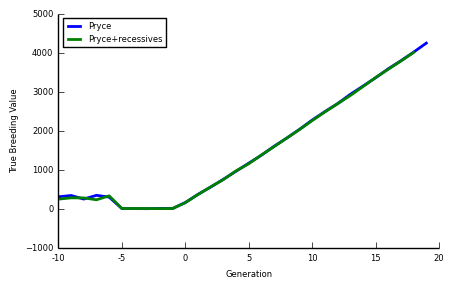

In [63]:
fig = plt.figure(figsize=fig_dims, dpi=300, facecolor='white')

# Set nicer limits
xmin ,xmax = 0, 30
ymin, ymax = 0, 0.25

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Generation')
ax.set_ylabel('True Breeding Value')
ax.plot(all_animals.groupby(['born']).mean()['TBV'], label='Pryce', linewidth=2)
ax.plot(all_animals_r.groupby(['born']).mean()['TBV'], label='Pryce+recessives', linewidth=2)
ax.legend(loc='best')

# Deal with ticks marks and labels
x_tick_locs = [t for t in xrange(0, 31, 5)]
x_tick_labels = [t for t in xrange(-10, 21, 5)]
xticks(x_tick_locs, x_tick_labels)

# Despine
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Plot and save
fig.tight_layout(pad=0.1)  # Make the figure use all available whitespace
fig.savefig('/Users/jcole/Documents/AIPL/Genomics/Recessives/average-tbv-by-gen-pryce-rec.png', dpi=300)

Looking at the plot below, it looks as though I may need to bump the difference between cows and bulls in order to separate the two groups a little more. In these results, it looks as though the TBV for the groups don't differ.

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#labels = ax.set_xticklabels(grouped['level_1'].unique())
ax.set_title('Mean TBV for Bulls and Cows')
ax.set_xlabel('Generation')
ax.set_ylabel('True Breeding Value')
for key, grp in grouped.groupby(['level_0']):
    ax.plot(grp['TBV'], label=key)
ax.legend(loc='best')

In the plot above it looks as though the bulls are "losing" their genetic base advantage in the first generation in which calves are produced. That's because they're being bred to cows that are not a good as they are, on average. Also, this plot includes all animals, including calves that died and cows and bulls that were culled without producing any offspring. A plot of the TBV of parents would be more informative as far as genetic trend goes. In order to do that, we need to count the number of offspring for each parent and merge them back into the all_animals data frame.

In [19]:
# How many calves did each bull sire?
sire_counts = pd.DataFrame(all_animals['sire'].value_counts(), columns=['offspring'])
# The Series index is the bull ID, which we want to convert to a column in the
# DataFrame.
sire_counts['animal'] = sire_counts.index
# We want to drop animal 0 because that's the unknown base-population sire.
sire_counts = sire_counts[sire_counts['animal'] > 0]
len(sire_counts)

354

In [20]:
# How many calves did each cow produce?
dam_counts = pd.DataFrame(all_animals['dam'].value_counts(), columns=['offspring'])
# The Series index is the bull ID, which we want to convert to a column in the
# DataFrame.
dam_counts['animal'] = dam_counts.index
# We want to drop animal 0 because that's the unknown base-population sire.
dam_counts = dam_counts[dam_counts['animal'] > 0]
len(dam_counts)

631971

In [21]:
# Now we do some merging. We must use LEFT OUTER JOINs in order to retain all animals
# even if they weren't parents.
with_sires = pd.merge(all_animals, sire_counts, on='animal', how='left')
with_dams = pd.merge(with_sires, dam_counts, on='animal', how='left')
all_animals = with_dams
all_animals['sex'].value_counts()

F    913492
M    880922
dtype: int64

In [22]:
# These are cows
all_animals['offspring_y'].value_counts()

1    193947
2    142271
3    100672
6     75796
4     72594
5     46673
dtype: int64

In [23]:
# These are bulls
all_animals['offspring_x'].value_counts()

5000    296
4999     52
4998      3
2449      1
1650      1
23        1
dtype: int64

Is there something screwy going on? I don't expect cows to have thousands of offspring.

The thing is, we now have two different columns for the offspring counts, named "offspring_x"
and "offspring_y". Can we just combine them using addition? (There's probably a clever way to
do this in the join, but I don't know it.

In [24]:
all_animals['offspring_x'].fillna(0, inplace=True)
all_animals['offspring_y'].fillna(0, inplace=True)
all_animals['offspring'] = all_animals['offspring_x'] + all_animals['offspring_y']

What does the distribution of offspring counts look like?

In [25]:
parents = all_animals[all_animals['offspring'] > 0]
parents.hist(column='offspring', by='sex')

array([<matplotlib.axes.AxesSubplot object at 0x1061db390>,
       <matplotlib.axes.AxesSubplot object at 0x10dc76850>], dtype=object)

Now I *think* that we have everything we need in order to subset and plot genetic trend for parents, not just all animals.

In [26]:
grouped = parents.groupby(['sex','born']).mean()
full_index = []
for x in ['F','M']:
    for g in all_animals['born'].unique():
        full_index.append((x,g))
grouped = grouped.reindex(full_index).reset_index()
grouped = grouped.add_suffix('').reset_index()
grouped = grouped.sort(['level_0','level_1'])

In [43]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Mean TBV for Parents')
ax.set_xlabel('Generation')
ax.set_ylabel('True Breeding Value')
for key, grp in grouped.groupby(['level_0']):
    ax.plot(grp['TBV'], label=key)
ax.legend(loc='best')

I also want to see what the inbreeding looks like. Plot by generation.

In [1]:
#fig = plt.figure(figsize=fig_dims, dpi=300, facecolor='white')
fig = plt.figure(figsize=(16, 12), dpi=300, facecolor='white')

# Set nicer limits
xmin ,xmax = 0, 30
ymin, ymax = 0, 0.25

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Generation')
ax.set_ylabel('Coefficient of inbreeding')
for key, grp in grouped.groupby(['level_0']):
    # This is producing the wrong labels on the x axis.
    if key == 'M': marker='s'
    else: marker = 'o'
    ax.plot(grp['inbreeding'], label=key, linewidth=2)
ax.legend(loc='best')

# Deal with ticks marks and labels
x_tick_locs = [t for t in xrange(0, 31, 5)]
x_tick_labels = [t for t in xrange(-10, 21, 5)]
xticks(x_tick_locs, x_tick_labels)

# Despine
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Plot and save
fig.tight_layout(pad=0.1)  # Make the figure use all available whitespace
fig.savefig('/Users/jcole/Documents/AIPL/Genomics/Recessives/holstein-inbreeding.png', dpi=300)

NameError: name 'plt' is not defined

Load the four allele frequency files.

In [29]:
rec_names = ['gen',
             'Brachyspina',
             'HH1',
             'HH2',
             'HH3',
             'HH4',
             'HH5',
             'BLAD',
             'CVM',
             'DUMPS',
             'Mulefoot',
             'Horned',
             'Red']

# We have 10 relicates for each simulation
for sim in xrange(1,11):
    # Load the individual history files
    freqs_random = pd.read_csv('holstein/%s/minor_allele_frequencies_ran_holstein.txt'%sim, \
                       sep='\t', header=None, names=rec_names)

    freqs_toppct = pd.read_csv('holstein/%s/minor_allele_frequencies_toppct_holstein.txt'%sim, \
                       sep='\t', header=None, names=rec_names)

    freqs_pryce = pd.read_csv('holstein/%s/minor_allele_frequencies_pryce_holstein.txt'%sim, \
                       sep='\t', header=None, names=rec_names)

    freqs_rec = pd.read_csv('holstein/%s/minor_allele_frequencies_pryce_r_holstein.txt'%sim, \
                       sep='\t', header=None, names=rec_names)
    
    freqs_random['rep'] = sim
    freqs_toppct['rep'] = sim
    freqs_pryce['rep'] = sim
    freqs_rec['rep'] = sim
    
    if sim == 1:
        all_random = freqs_random
        all_toppct = freqs_toppct
        all_pryce = freqs_pryce
        all_rec = freqs_rec
    else:
        all_random = pd.concat([all_random, freqs_random])
        all_toppct = pd.concat([all_toppct, freqs_toppct])
        all_pryce = pd.concat([all_pryce, freqs_pryce])
        all_rec = pd.concat([all_rec, freqs_rec])

Now we have final allele frequencies for each of the 10 replicates. We need to take the mean over the replicates for each recessive and plot those.

In [30]:
grouped_random = all_random.groupby(['gen']).mean()
grouped_toppct = all_toppct.groupby(['gen']).mean()
grouped_pryce = all_pryce.groupby(['gen']).mean()
grouped_rec = all_rec.groupby(['gen']).mean()

Plot the minor allele frequencies.

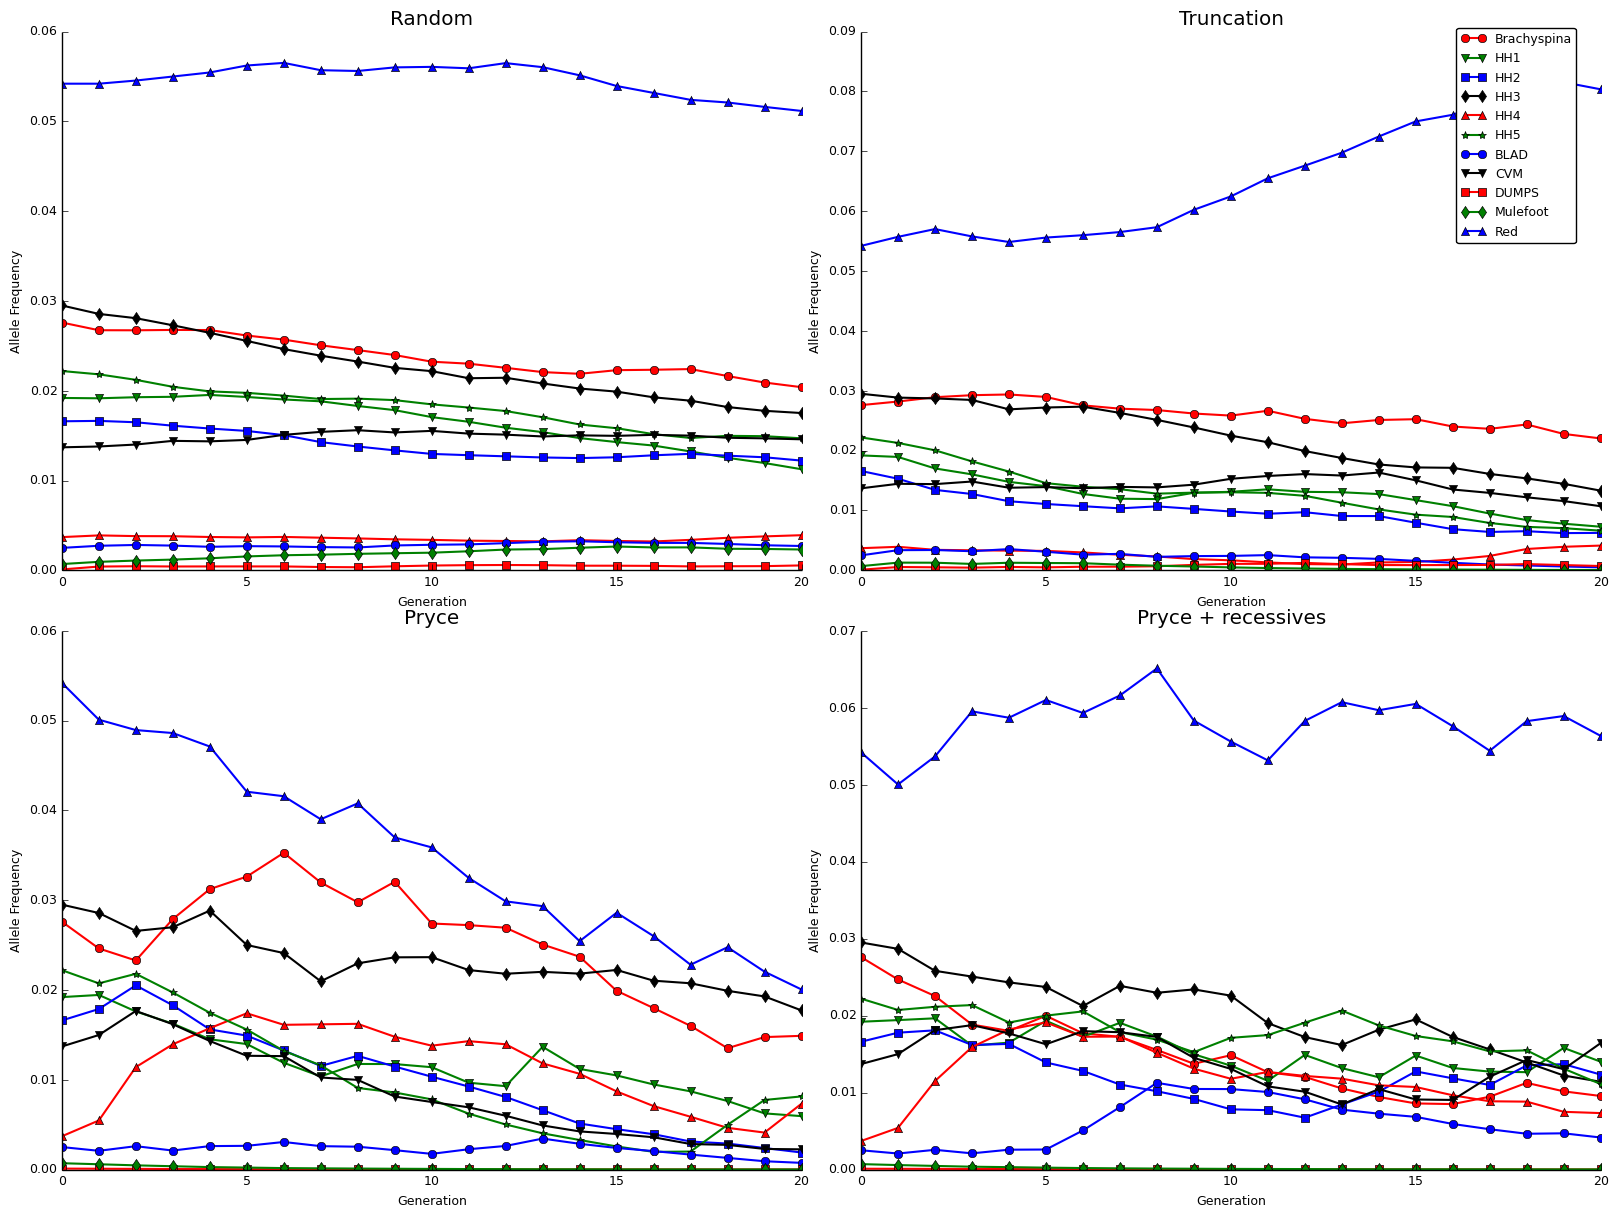

In [111]:
#fig = plt.figure(figsize=fig_dims, dpi=300, facecolor='white')
fig = plt.figure(figsize=(16, 12), dpi=300, facecolor='white')

# Set nicer limits
xmin ,xmax = 0, 20
ymin, ymax = 0, 0.10
recessives = rec_names[1:]

# Compute the expected frequency for each generation.
expected = {}
for i, r in enumerate(recessives):
    expected[r] = []
    # Red and horned are NOT lethals
    if r in ['Horned', 'Red']:
        for g in xrange(0,21):
                if g == 0:
                    expected[r].append(grouped_random[r][g])
                else:
                    q0 = expected[r][g-1]
                    p0 = 1. - q0
                    q1 = (p0*q0) + q0**2
                    expected[r].append(q1)        
    # The others are
    else:
        for g in xrange(0,21):
                if g == 0:
                    expected[r].append(grouped_random[r][g])
                else:
                    q0 = expected[r][g-1]
                    p0 = 1. - q0
                    q1 = (p0*q0) / (p0**2 + (2*p0*q0))
                    expected[r].append(q1)

# Now, plot all the things.                
colors = itertools.cycle(['r', 'g', 'b','k'])
markers = itertools.cycle(['o', 'v', 's', 'd', '^', '*'])
ax = fig.add_subplot(2, 2, 1)
ax.set_title('Random')
ax.set_xlabel('Generation')
ax.set_ylabel('Allele Frequency')
# Despine
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
for i, r in enumerate(recessives):
    if r != 'Horned':
        ax.plot(grouped_random[r], label=r, marker=markers.next(), c=colors.next(), lw=1.5)
        # Deal with ticks marks and labels
        x_tick_locs = [t for t in xrange(0, 21, 5)]
        x_tick_labels = [t for t in xrange(0, 21, 5)]
        xticks(x_tick_locs, x_tick_labels)
        # Despine
        ax = gca()
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

colors = itertools.cycle(['r', 'g', 'b','k'])
markers = itertools.cycle(['o', 'v', 's', 'd', '^', '*'])
ax = fig.add_subplot(2, 2, 2)
ax.set_title('Truncation')
ax.set_xlabel('Generation')
ax.set_ylabel('Allele Frequency')
# Despine
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
for i, r in enumerate(recessives):
    if r != 'Horned':
        ax.plot(grouped_toppct[r], label=r, marker=markers.next(), c=colors.next(), lw=1.5)
        # Deal with ticks marks and labels
        x_tick_locs = [t for t in xrange(0, 21, 5)]
        x_tick_labels = [t for t in xrange(0, 21, 5)]
        xticks(x_tick_locs, x_tick_labels)
        # Despine
        ax = gca()
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

colors = itertools.cycle(['r', 'g', 'b','k'])
markers = itertools.cycle(['o', 'v', 's', 'd', '^', '*'])
ax = fig.add_subplot(2, 2, 3)
ax.set_title('Pryce')
ax.set_xlabel('Generation')
ax.set_ylabel('Allele Frequency')
# Despine
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
for i, r in enumerate(recessives):
    if r != 'Horned':
        ax.plot(grouped_pryce[r], label=r, marker=markers.next(), c=colors.next(), lw=1.5)
        # Deal with ticks marks and labels
        x_tick_locs = [t for t in xrange(0, 21, 5)]
        x_tick_labels = [t for t in xrange(0, 21, 5)]
        xticks(x_tick_locs, x_tick_labels)
        # Despine
        ax = gca()
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

colors = itertools.cycle(['r', 'g', 'b','k'])
markers = itertools.cycle(['o', 'v', 's', 'd', '^', '*'])
ax = fig.add_subplot(2, 2, 4)
ax.set_title('Pryce + recessives')
ax.set_xlabel('Generation')
ax.set_ylabel('Allele Frequency')
# Despine
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
for i, r in enumerate(recessives):
    if r != 'Horned':
        ax.plot(grouped_rec[r], label=r, marker=markers.next(), c=colors.next(), lw=1.5)
        # Deal with ticks marks and labels
        x_tick_locs = [t for t in xrange(0, 21, 5)]
        x_tick_labels = [t for t in xrange(0, 21, 5)]
        xticks(x_tick_locs, x_tick_labels)
        # Despine
        ax = gca()
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

h, l = ax.get_legend_handles_labels()
leg = plt.figlegend(h, l, loc=(0.90, 0.8), fancybox=True)
rect = leg.get_frame()
rect.set_facecolor('white')
#suptitle = plt.suptitle('Allele Frequency Change Over Time for Several Mating Schemes', x = 0.5, y = 1.05, fontsize=18)

# Plot and save
#plt.tight_layout(pad=1., w_pad=0.5, h_pad=0.5)
fig.tight_layout(pad=0.1)  # Make the figure use all available whitespace
fig.savefig('/Users/jcole/Documents/AIPL/Genomics/Recessives/holstein-observed-allele-frequency-changes.png', dpi=300)

Let's try a small multiples-type of plot to show the actual versus expected frequencies.

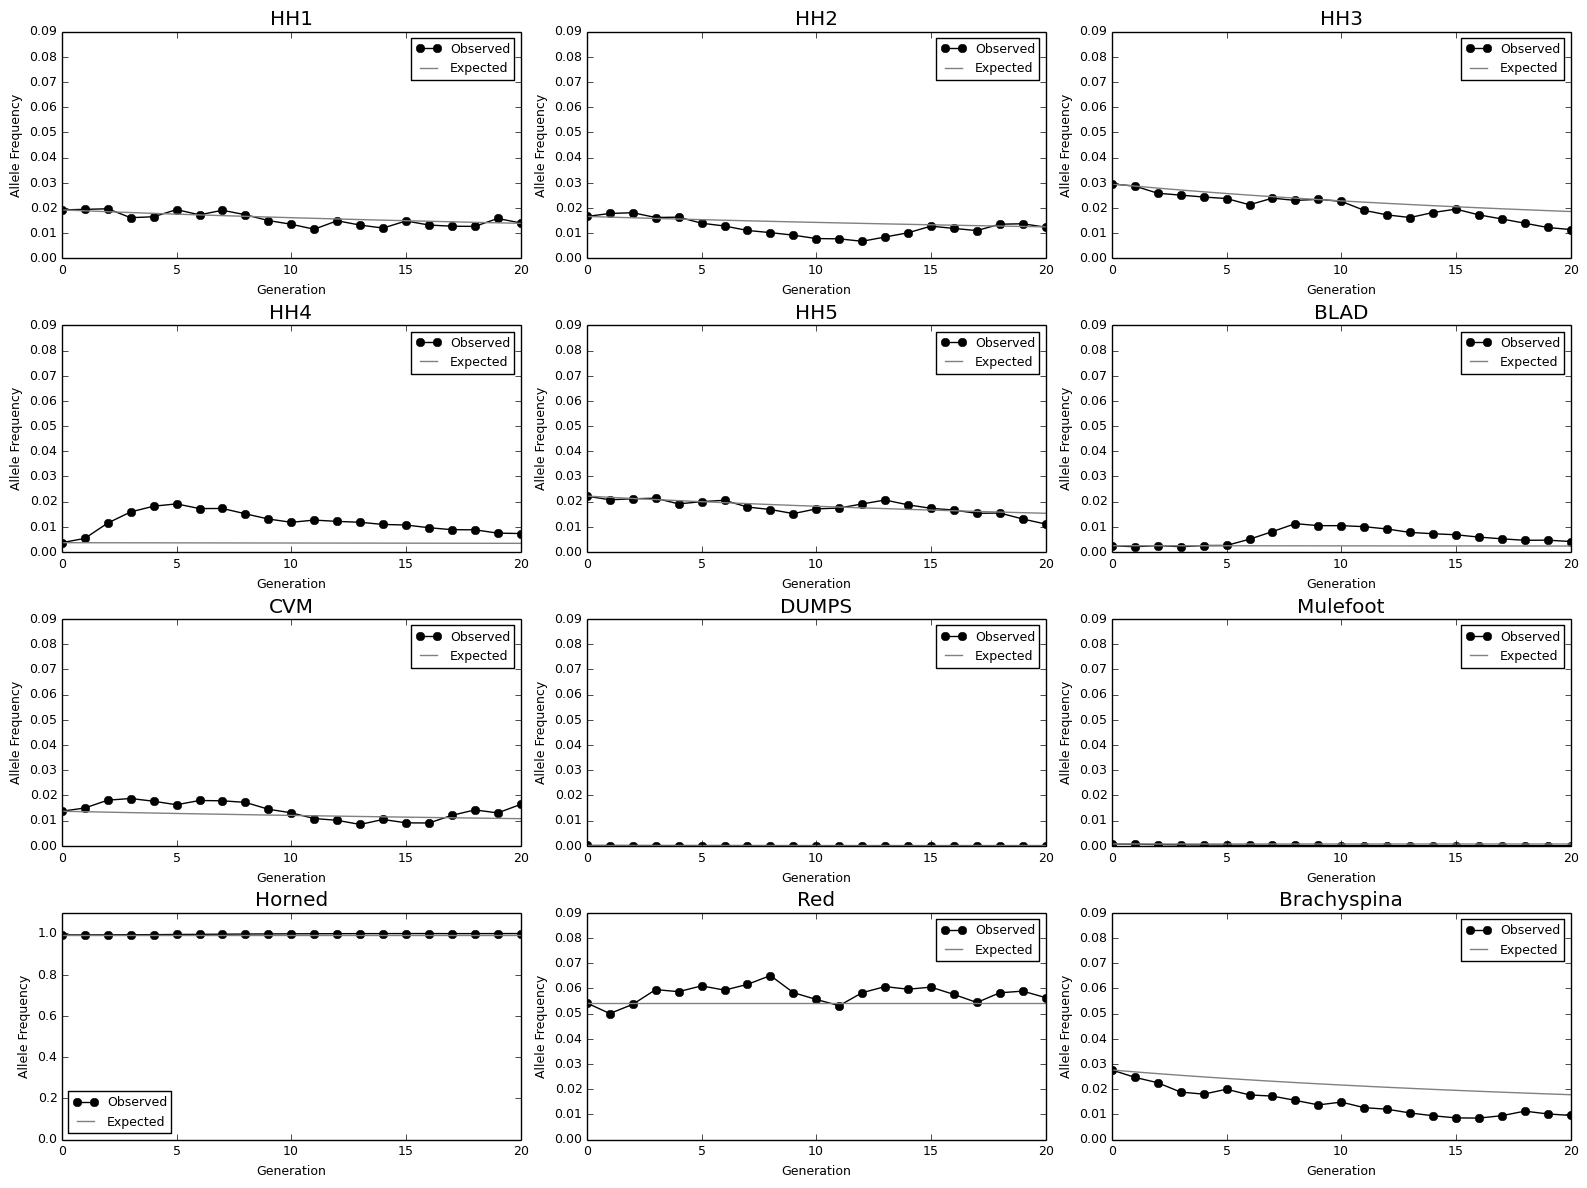

In [114]:
fig = plt.figure(figsize=(16, 12), dpi=300, facecolor='white')

# Plot Pryce + recessives
colors = itertools.cycle(['r', 'g', 'b'])
for i, r in enumerate(recessives):
    ax = fig.add_subplot(4, 3, i)
    ax.set_title(r)
    ax.set_xlabel('Generation')
    ax.set_ylabel('Allele Frequency')
    ax.plot(grouped_rec[r], label='Observed', marker='o', c='k')
    ax.plot(expected[r], label='Expected', c='gray')
    if r == 'Horned':
        ax.set_ylim(0.0, 1.1)
    else:
        ax.set_ylim(0.0, 0.09)
    legend(loc='best')
        
plt.tight_layout(pad=1., w_pad=0.5, h_pad=0.5)
fig.savefig('/Users/jcole/Documents/AIPL/Genomics/Recessives/holstein-act-vs-exp-rec.png', dpi=300)

Let's take a look at just the Pryce inbreeding adjustment, then. See if it's less messy.

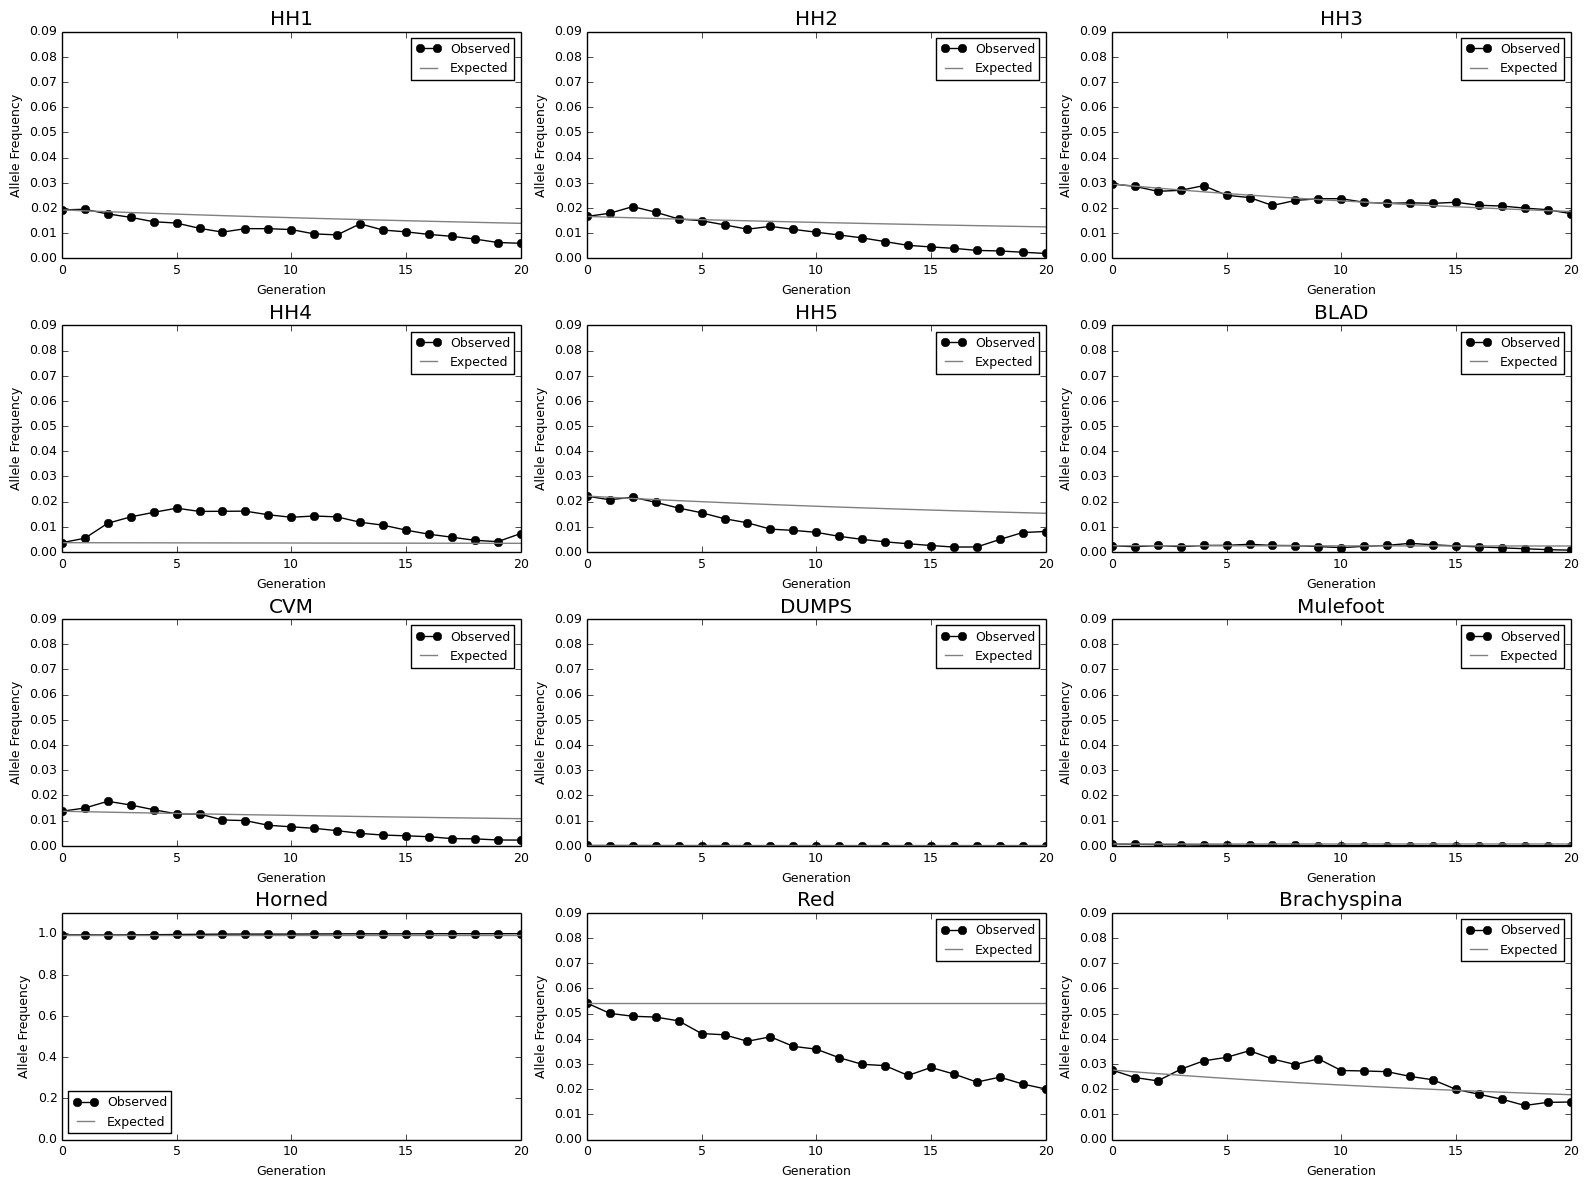

In [113]:
fig = plt.figure(figsize=(16, 12), dpi=300, facecolor='white')

# Plot Pryce + recessives
colors = itertools.cycle(['r', 'g', 'b'])
for i, r in enumerate(recessives):
    ax = fig.add_subplot(4, 3, i)
    ax.set_title(r)
    ax.set_xlabel('Generation')
    ax.set_ylabel('Allele Frequency')
    ax.plot(grouped_pryce[r], label='Observed', marker='o', c='k')
    ax.plot(expected[r], label='Expected', c='gray')
    if r == 'Horned':
        ax.set_ylim(0.0, 1.1)
    else:
        ax.set_ylim(0.0, 0.09)
    legend(loc='best')
        
plt.tight_layout(pad=1., w_pad=0.5, h_pad=0.5)
fig.savefig('/Users/jcole/Documents/AIPL/Genomics/Recessives/holstein-act-vs-exp-pryce.png', dpi=300)

Now we're going to fit a linear regression to each recessive in each scenario. The frequency is the dependent variable, and the generation number is the independent variable.

In [100]:
def fit_line(x, y):
    """Return RegressionResults instance of best-fit line."""
    X = sm.add_constant(x)
    model = sm.OLS(y, X, missing='drop')
    fit = model.fit()
    return fit

In [102]:
grouped_random_fits = {}
for i, r in enumerate(recessives):
    fit = fit_line(grouped_random.index.values, grouped_random[r])
    grouped_random_fits[r] = fit

grouped_toppct_fits = {}
for i, r in enumerate(recessives):
    fit = fit_line(grouped_toppct.index.values, grouped_toppct[r])
    grouped_toppct_fits[r] = fit
    
grouped_pryce_fits = {}
for i, r in enumerate(recessives):
    fit = fit_line(grouped_pryce.index.values, grouped_pryce[r])
    grouped_pryce_fits[r] = fit
    
grouped_rec_fits = {}
for i, r in enumerate(recessives):
    fit = fit_line(grouped_rec.index.values, grouped_rec[r])
    grouped_rec_fits[r] = fit
    
expected_fits = {}
for i, r in enumerate(recessives):
    fit = fit_line(grouped_rec.index.values, expected[r])
    expected_fits[r] = fit

In [103]:
from scipy.special import stdtr
def test_slopes(fit1, fit2, debug=False):
    """Perform a t-test of regression slopes assuming unequal variances."""
    sigma_b1_b2 = math.sqrt( fit1.bse[1]**2 + fit2.bse[1]**2 )
    t = (fit1.params[1] - fit2.params[1]) / sigma_b1_b2
    df = fit1.nobs + fit2.nobs - 4
    pvalue = 2*stdtr(df, -abs(t))
    if debug:
        print 'sigma_b1_b2: ', sigma_b1_b2
        print 'fit1.params[1]', fit1.params[1]
        print 'fit2.params[1]', fit2.params[1]
        print 'fit1.params[1] - fit2.params[1]', fit1.params[1] - fit2.params[1]
        print 't: ', t
        print 'df: ', df
        print 'pvalue: ', pvalue
    
    return t, pvalue

In [104]:
print 'Random versus Pryce+recessives'
for i, r in enumerate(recessives):
    tval, pval = test_slopes(grouped_random_fits[r], grouped_rec_fits[r])
    if pval < 0.05/11.: significant = '****'
    else: significant = ''
    print '\t%s:\tt = \t%s\tp = \t%s\t%s' % ( r, tval, pval, significant )

Random versus Pryce+recessives
	Brachyspina:	t = 	6.24147560802	p = 	2.65622570745e-07	****
	HH1:	t = 	-1.49753025886	p = 	0.142516581774	
	HH2:	t = 	0.343519173566	p = 	0.733101364911	
	HH3:	t = 	3.31403083757	p = 	0.0020278623914	****
	HH4:	t = 	1.27111143249	p = 	0.211415112266	
	HH5:	t = 	-0.210858829383	p = 	0.834124117464	
	BLAD:	t = 	-1.29255929481	p = 	0.203968061697	
	CVM:	t = 	3.22837531285	p = 	0.00256677843481	****
	DUMPS:	t = 	4.19401026421	p = 	0.000158138496226	****
	Mulefoot:	t = 	13.8196686621	p = 	2.11874233755e-16	****
	Horned:	t = 	-11.3895027302	p = 	8.13937093418e-14	****
	Red:	t = 	-1.85306372112	p = 	0.0716505962255	


In [105]:
print 'Pryce versus Pryce+recessives'
print '\tTrait\tb0_pryce\t\tb0_rec\t\t\tFaster\tt-value\t\tp-value\t\t\tsig'
print '\t%s' % ( '-'*110 )
for i, r in enumerate(recessives):
    tval, pval = test_slopes(grouped_pryce_fits[r], grouped_rec_fits[r])
    if pval < 0.05/11.: significant = '****'
    else: significant = ''
    if grouped_rec_fits[r].params[1] > grouped_pryce_fits[r].params[1]: bigger = 'P'
    else: bigger = 'R'
    if r == 'Brachyspina': rprint = 'Brachy'
    elif r == 'Mulefoot': rprint = 'Mule'
    else: rprint = r
    print '\t%s\t%s\t%s\t%s\t%s\t%s\t%s' % ( rprint, grouped_pryce_fits[r].params[1],
                                             grouped_rec_fits[r].params[1], bigger,
                                             tval, pval, significant )

Pryce versus Pryce+recessives
	Trait	b0_pryce		b0_rec			Faster	t-value		p-value			sig
	--------------------------------------------------------------------------------------------------------------
	Brachy	-0.0007765652659	-0.000834404677284	R	0.322263279119	0.749019580582	
	HH1	-0.000560256293207	-0.000329029838517	P	-2.63662134807	0.0120609598033	
	HH2	-0.000927756656232	-0.000275129269284	P	-5.59708531778	2.03256834782e-06	****
	HH3	-0.000479146506602	-0.000786389266986	R	4.24009177782	0.000137634003325	****
	HH4	-0.000288210661272	-0.000203821003664	P	-0.39002684589	0.698694380964	
	HH5	-0.000970139350692	-0.000372962165503	P	-4.36655479035	9.38237749403e-05	****
	BLAD	-5.73966898005e-05	0.000159939133403	P	-1.97744851543	0.0552779093335	
	CVM	-0.000789708578154	-0.000301636501328	P	-4.24889762312	0.000134023227852	****
	DUMPS	-3.85892187619e-06	-4.20170316771e-06	R	0.536754258369	0.594566271882	
	Mule	-2.8207947078e-05	-2.81930840936e-05	P	-0.0028039717619	0.997777425936	
	Horned	

In [106]:
print 'Pryce versus Expected'
print '\tTrait\tb0_rec\t\t\tb0_exp\t\t\tFaster\tt-value\t\tp-value\t\t\tsig'
print '\t%s' % ( '-'*110 )
for i, r in enumerate(recessives):
    tval, pval = test_slopes(grouped_pryce_fits[r], expected_fits[r])
    if pval < 0.05/11.: significant = '****'
    else: significant = ''
    if grouped_rec_fits[r].params[1] > expected_fits[r].params[1]: bigger = 'E'
    else: bigger = 'O'
    if r == 'Brachyspina': rprint = 'Brachy'
    elif r == 'Mulefoot': rprint = 'Mule'
    else: rprint = r
    print '\t%s\t%s\t%s\t%s\t%s\t%s\t%s' % ( rprint, grouped_pryce_fits[r].params[1],
                                             expected_fits[r].params[1], bigger,
                                             tval, pval, significant )

Pryce versus Expected
	Trait	b0_rec			b0_exp			Faster	t-value		p-value			sig
	--------------------------------------------------------------------------------------------------------------
	Brachy	-0.0007765652659	-0.000482812233646	O	-1.79627770581	0.0804039459152	
	HH1	-0.000560256293207	-0.000263968742125	O	-4.91431903998	1.73445297355e-05	****
	HH2	-0.000927756656232	-0.000205430465115	O	-16.4749695409	6.7839453867e-19	****
	HH3	-0.000479146506602	-0.000537394899551	O	1.17101731946	0.248882782766	
	HH4	-0.000288210661272	-1.27411884533e-05	O	-1.74867709891	0.0884218339492	
	HH5	-0.000970139350692	-0.000337395004281	O	-5.18496249738	7.44002210394e-06	****
	BLAD	-5.73966898005e-05	-5.95116963483e-06	E	-2.45491209384	0.0187822017632	
	CVM	-0.000789708578154	-0.000146587373394	O	-13.4049705528	5.56435102712e-16	****
	DUMPS	-3.85892187619e-06	-9.9800365138e-09	O	-7.60724413234	3.76561930753e-09	****
	Mule	-2.8207947078e-05	-4.83226727987e-07	O	-7.13200810132	1.63124660346e-08	****
	Horn

In [107]:
print 'Pryce+recessives versus Expected'
print '\tTrait\tb0_rec\t\t\tb0_exp\t\t\tFaster\tt-value\t\tp-value\t\t\tsig'
print '\t%s' % ( '-'*110 )
for i, r in enumerate(recessives):
    tval, pval = test_slopes(grouped_rec_fits[r], expected_fits[r])
    if pval < 0.05/11.: significant = '****'
    else: significant = ''
    if grouped_rec_fits[r].params[1] > expected_fits[r].params[1]: bigger = 'E'
    else: bigger = 'O'
    if r == 'Brachyspina': rprint = 'Brachy'
    elif r == 'Mulefoot': rprint = 'Mule'
    else: rprint = r
    print '\t%s\t%s\t%s\t%s\t%s\t%s\t%s' % ( rprint, grouped_rec_fits[r].params[1],
                                             expected_fits[r].params[1], bigger,
                                             tval, pval, significant )

Pryce+recessives versus Expected
	Trait	b0_rec			b0_exp			Faster	t-value		p-value			sig
	--------------------------------------------------------------------------------------------------------------
	Brachy	-0.000834404677284	-0.000482812233646	O	-4.60979337164	4.45601065264e-05	****
	HH1	-0.000329029838517	-0.000263968742125	O	-1.01452037871	0.316750864706	
	HH2	-0.000275129269284	-0.000205430465115	O	-0.644358506475	0.52321380958	
	HH3	-0.000786389266986	-0.000537394899551	O	-4.36305739162	9.48269986726e-05	****
	HH4	-0.000203821003664	-1.27411884533e-05	O	-1.28826818548	0.205441907026	
	HH5	-0.000372962165503	-0.000337395004281	O	-0.567366473246	0.573802055238	
	BLAD	0.000159939133403	-5.95116963483e-06	E	1.53757549764	0.13243844846	
	CVM	-0.000301636501328	-0.000146587373394	O	-1.48488751436	0.145822621573	
	DUMPS	-4.20170316771e-06	-9.9800365138e-09	O	-10.7571754408	4.32052705313e-13	****
	Mule	-2.81930840936e-05	-4.83226727987e-07	O	-7.68956097423	2.92727763991e-09	****
	Horned	

Reference figure for expected rate of allele frequency change.

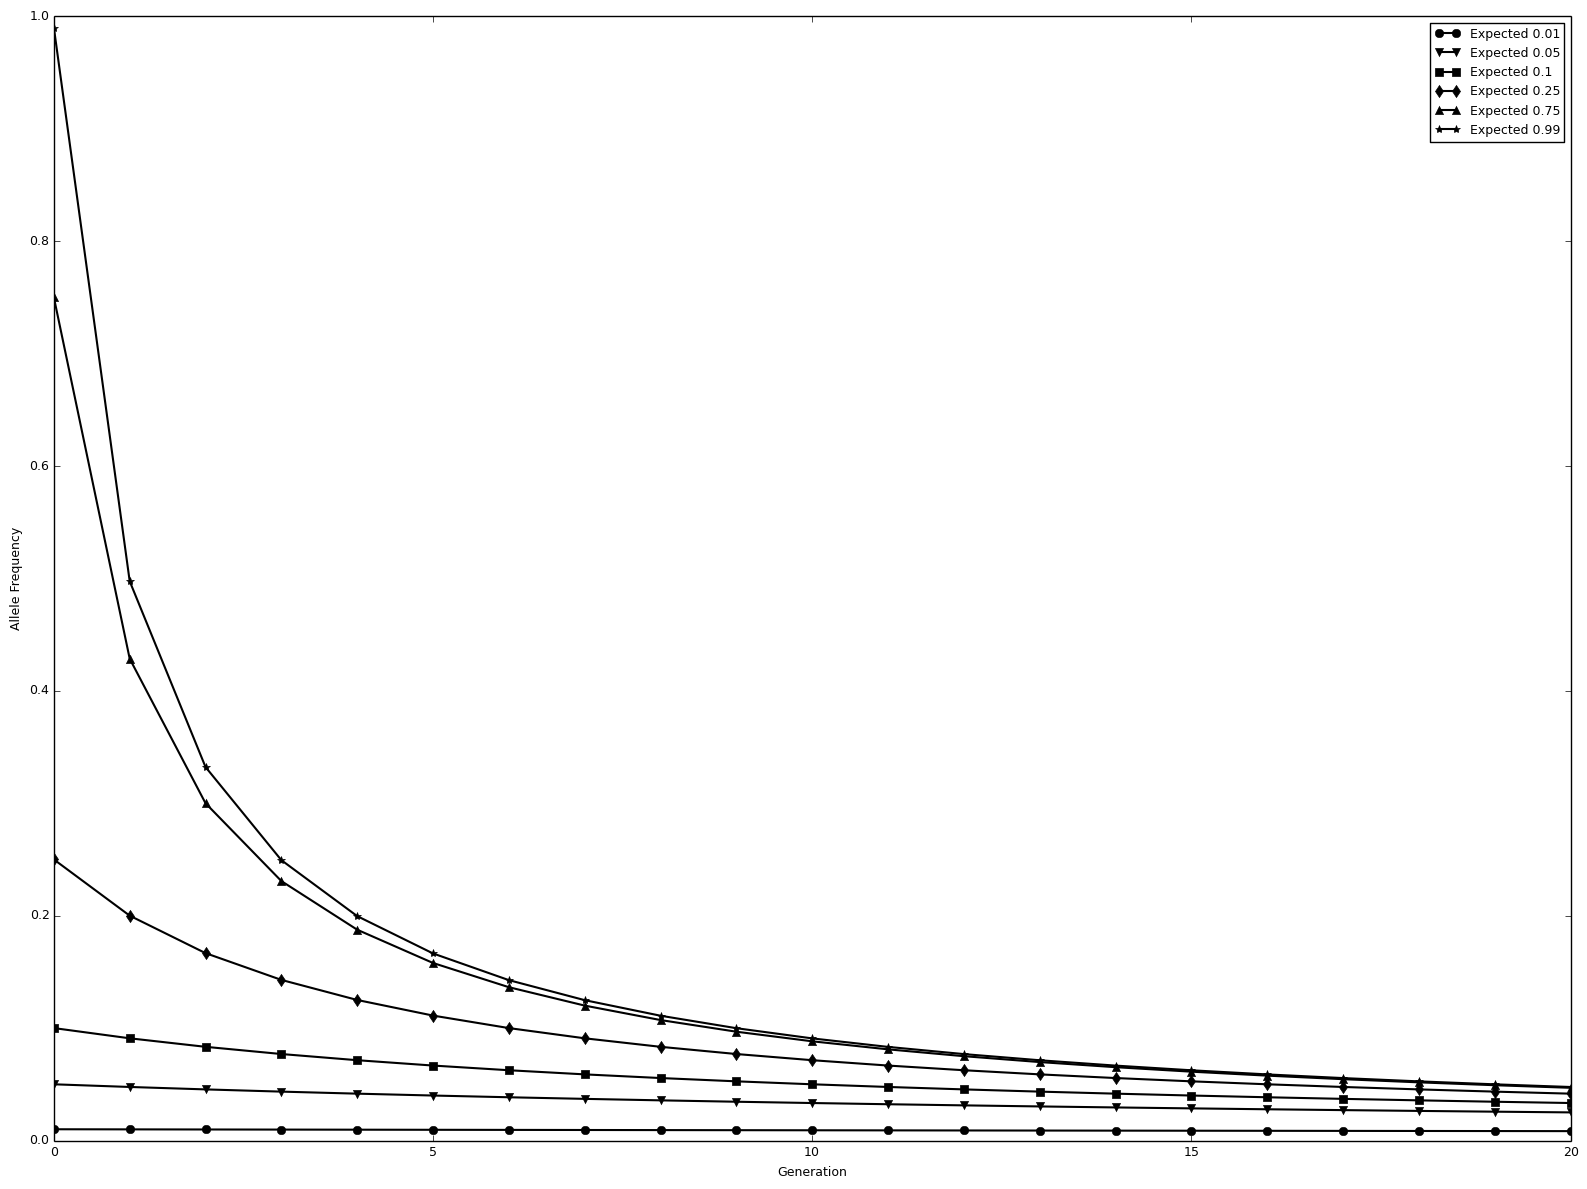

In [109]:
fig = plt.figure(figsize=(16, 12), dpi=300, facecolor='white')

markers = itertools.cycle(['o', 'v', 's', 'd', '^', '*'])

# Compute the expected frequency for each generation.
expected = {}
for r in [0.01, 0.05, 0.10, 0.25, 0.75, 0.99]:
    expected[r] = []
    for g in xrange(0,21):
            if g == 0:
                expected[r].append(r)
            else:
                q0 = expected[r][g-1]
                p0 = 1. - q0
                q1 = (p0*q0) / (p0**2 + (2*p0*q0))
                expected[r].append(q1)
    
ax = fig.add_subplot(1, 1, 1)
#ax.set_title('Expected Change in Allele Frequencies')
ax.set_xlabel('Generation')
ax.set_ylabel('Allele Frequency')
for r in [0.01, 0.05, 0.10, 0.25, 0.75, 0.99]:
    l = 'Expected %s' % ( r )
    ax.plot(expected[r], label=l, c='k', lw=1.5, marker=markers.next())
ax.set_ylim(0.0, 1.0)
#legend = ax.legend(loc='upper right', shadow=False)
                
legend(loc='best')
plt.tight_layout(pad=1., w_pad=0.5, h_pad=0.5)
fig.savefig('/Users/jcole/Documents/AIPL/Genomics/Recessives/expected-allele-frequency-change.png', dpi=300)